# Data Exploration 01

We are looking at the full dataset from Aparna's paper, now that we've calculated its transposed and cleaned the entries.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statdepth
import plotly.express as px 
import dask
import dask.dataframe as dd

In [48]:
organoid = dd.read_csv('../data/interim/organoid_T.csv', dtype='float64')
# primary = pd.read_csv('../data/interim/primary_T.csv', dtype='float64')

organoid_meta = pd.read_csv('../data/processed/meta_organoid.tsv', sep='\t', nrows=1000)
primary_meta = pd.read_csv('../data/processed/meta_primary.tsv', sep='\t', nrows=1000)

In [41]:
organoid.head()

,FO538757.2|FO538757.2,AP006222.2|AP006222.2,RP11-206L10.9|RP11-206L10.9,RP11-54O7.1|RP11-54O7.1,RP11-54O7.3|RP11-54O7.3,SAMD11|SAMD11,NOC2L|NOC2L,KLHL17|KLHL17,RP11-54O7.17|RP11-54O7.17,HES4|HES4,...,GTF3C3|GTF3C3,PGAP1|PGAP1,ANKRD44|ANKRD44,SF3B1|SF3B1,COQ10B|COQ10B,HSPD1|HSPD1,HSPE1|HSPE1,MOB4|MOB4,RFTN2|RFTN2,MARS2|MARS2
0,0.056281,0.0,0.484291,0.0,0.0,0.0,0.244218,0.0,0.0,0.869861,...,0.319813,0.048829,0.0,0.669813,0.0,1.611241,1.745470,0.821874,0.832343,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.845953,...,0.000000,0.000000,0.0,0.000000,0.0,1.980886,1.998116,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,2.181963,...,0.000000,0.000000,0.0,1.254358,0.0,0.000000,1.465232,0.000000,0.000000,0.0
3,1.177366,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.282427,...,0.000000,0.000000,0.0,0.000000,0.0,1.819707,1.806732,0.000000,0.000000,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.284198,0.000000,0.000000,0.0


In [49]:
organoid.columns = [x.split('|')[0] for x in organoid.columns]

In [54]:
isna = organoid.isna().sum()

In [56]:
isna.compute()

KeyboardInterrupt: 

Let's try visualizing these random cells using UMAP

In [52]:
import umap

def umap_calc(df):
    proj = umap.UMAP(verbose=True)
    return proj.fit_transform(df)

umap = dask.delayed(umap_calc)(organoid)

In [53]:
result = umap.compute()

KeyboardInterrupt: 

And now we can visualize the results

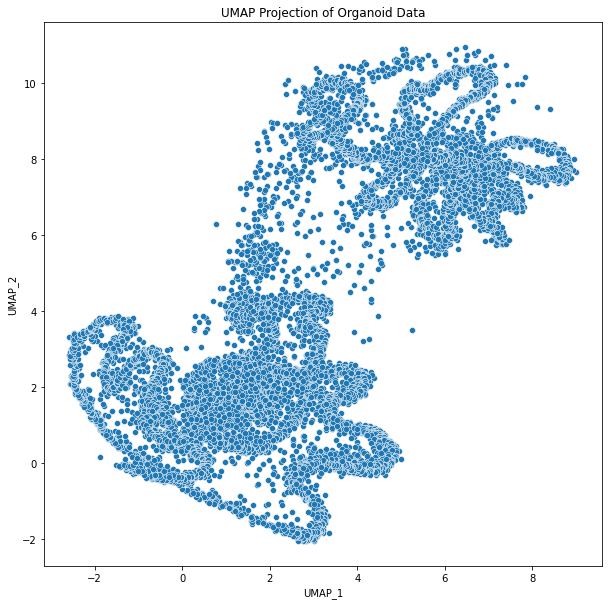

In [46]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(
    x="UMAP_1", 
    y="UMAP_2", 
    data=umap_organoid,
    legend='full',
    ax=ax,
)

plt.title(f'UMAP Projection of Organoid Data')
plt.show()